In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("NaturalGas_CA.csv")

In [3]:
df1 = pd.read_csv("Covid - 19 Envir Master.csv")

In [4]:
df = df.drop(["Unnamed: 0"], axis=1)

In [5]:
f = lambda x: x["Date"].split("-")[0]

In [6]:
df["Year"] = df.apply(f, axis=1)

In [7]:
df

,Date,Gas Delivered,Year
0,2005-01-15,228279,2005
1,2005-02-15,203927,2005
2,2005-03-15,184829,2005
3,2005-04-15,170521,2005
4,2005-05-15,163918,2005
...,...,...,...
190,2020-12-15,211375,2020
191,2021-01-15,198199,2021
192,2021-02-15,166360,2021
193,2021-03-15,180131,2021


In [8]:
df.Year.unique()

array(['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021'], dtype=object)

In [9]:
df_new = df[df["Year"] > '2014'][:-3]

In [10]:
df_new = df_new.reset_index()

In [11]:
df_new["No2_con"] = df1[["No2_con"]]

In [12]:
df_new

,index,Date,Gas Delivered,Year,No2_con
0,120,2015-01-15,216065,2015,26.100
1,121,2015-02-15,165799,2015,23.780
2,122,2015-03-15,168835,2015,22.808
3,123,2015-04-15,164979,2015,18.717
4,124,2015-05-15,162529,2015,12.130
...,...,...,...,...,...
67,187,2020-09-15,168550,2020,15.303
68,188,2020-10-15,172144,2020,21.625
69,189,2020-11-15,179021,2020,25.384
70,190,2020-12-15,211375,2020,26.773


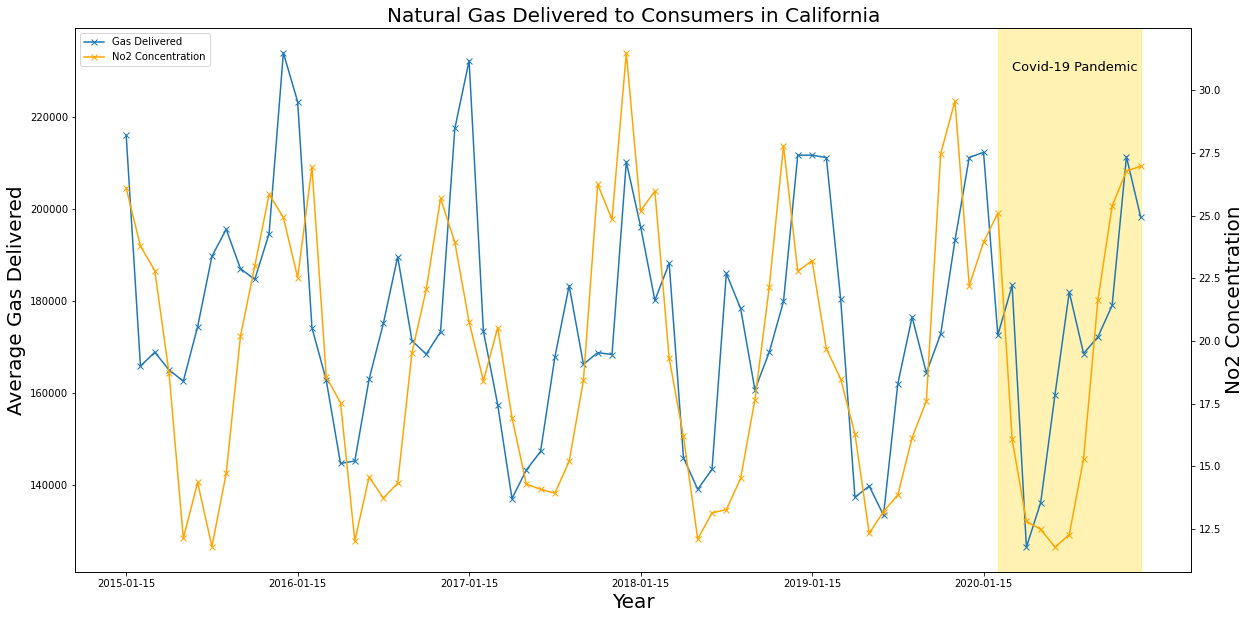

In [13]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
ax.plot(df_new["Date"], df_new["Gas Delivered"], label = "Gas Delivered", marker="x")

ax.set(xlabel = "Year", ylabel = "Average Gas Delivered", title = "Natural Gas Delivered to Consumers in California")
ax.set_xticks(df_new.Date[::12])

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]):
    item.set_fontsize(20)
    
ax.axvspan(61,71, alpha = 0.3, color = "gold")
ax.text(62,230000,'Covid-19 Pandemic', fontsize=13)


ax2=ax.twinx()
ax2.plot(df_new["Date"], df_new["No2_con"], label = "No2 Concentration", c='Orange',marker='x')
ax2.set_ylabel("No2 Concentration",color="Black",fontsize=20)
ax2.set_xticks(df_new.Date[::12])
fig.legend(loc='upper left',bbox_to_anchor=(0,1), bbox_transform=ax.transAxes)
plt.show()

fig.savefig("No2_GasDelivered.png")
